# Processamento de dados sonometro

## Ler ficheiro

In [1]:
import struct

fn = "download.bin"

bin_file = open(fn,mode="rb")

header = bin_file.read(5) # Start header
if (header != b'start'): 
    raise(Exception("Wrong header: " + str(header)))

bin_file.read(1) #Spacing byte

date = bin_file.read(6) # read start date from header

print("Start date: %d-%d-%d %dh%dm%ds\n" % (
    date[0]+2000,
    date[1],
    date[2],
    date[3],
    date[4],
    date[5])
)

data = bin_file.read()

db_l = []

record_format = 'fB'
record_size = struct.calcsize(record_format)

while (data):
    #s = ' '.join(map('{:02X}'.format, data[0:record_size]))
    #print(s)
    
    decibel, ms = struct.unpack(record_format, data[0:record_size])
        
    # Print or process the values
    # print(f"Decibel: {decibel}, ms: {ms}")
    db_l.append(decibel)

    data = data[record_size:]


bin_file.close()
print("Done!")

Start date: 2024-11-14 21h9m12s

Done!


<Axes: >

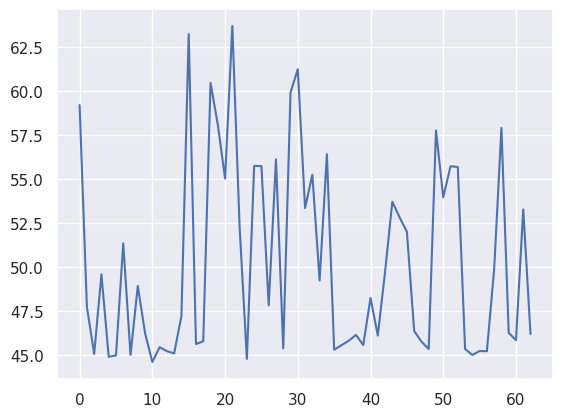

In [2]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

sns.lineplot(db_l)
